In [1]:
# imports
import os
import pandas as pd
import numpy as np

In [2]:
# settings
import warnings
warnings.simplefilter(action='ignore')
pd.set_option('display.max_columns', None)

# EDA

In [3]:
df0 = pd.read_csv('./Dataset/HR_comma_sep.csv')

In [4]:
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


No null values. Can check further with:

In [7]:
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

Rename columns. Some are too long.

In [8]:
df0 = df0.rename(columns={
    'Work_accident': 'work_accident',
    'average_montly_hours': 'average_monthly_hours',
    'Department':'department',
    'time_spend_company':'tenure',
})

df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

Check duplicates

In [9]:
df0.duplicated().sum()

np.int64(3008)

There's 3008 rows that are duplicated. How likely that 2 employees got the exact same stats at work? Probably unlikely, can do likelihood analysis with Bayes' theorem.

Let's drop the duplicates.

In [10]:
df0[df0.duplicated()].head()
df1 = df0.drop_duplicates(keep = 'first')
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Check outliers for 'tenure' column.

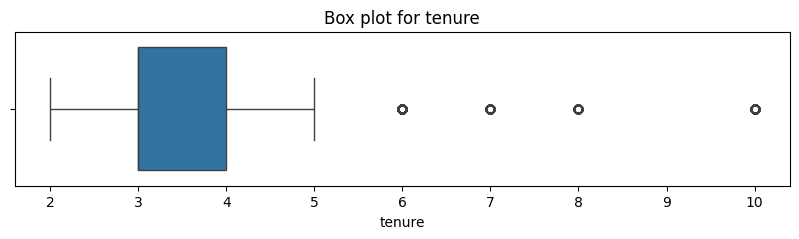

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,2))
sns.boxplot(x=df1['tenure'])
plt.title('Box plot for tenure', fontsize = 12)
plt.show()

In [12]:
percentile25 = df1['tenure'].quantile(0.25)
percentile75 = df1['tenure'].quantile(0.75)

IQR = percentile75 - percentile25

upperlimit = percentile75 + 1.5 * IQR
lowerlimit = percentile25 - 1.5 * IQR

outliers = df1[(df1['tenure'] > upperlimit) | (df1['tenure'] < lowerlimit)]
print(f'Lower limit for tensure: {lowerlimit}')
print(f'Upper limit for tensure: {upperlimit}')
print(f'Num of outliers for tenure: {len(outliers)}')

Lower limit for tensure: 1.5
Upper limit for tensure: 5.5
Num of outliers for tenure: 824


# Explore with Data Viz

Examine some variables we're interested in for those who stayed and left. Start with a Heatmap to see correlated variables.

Text(0.5, 1.0, 'Correlation Heatmap')

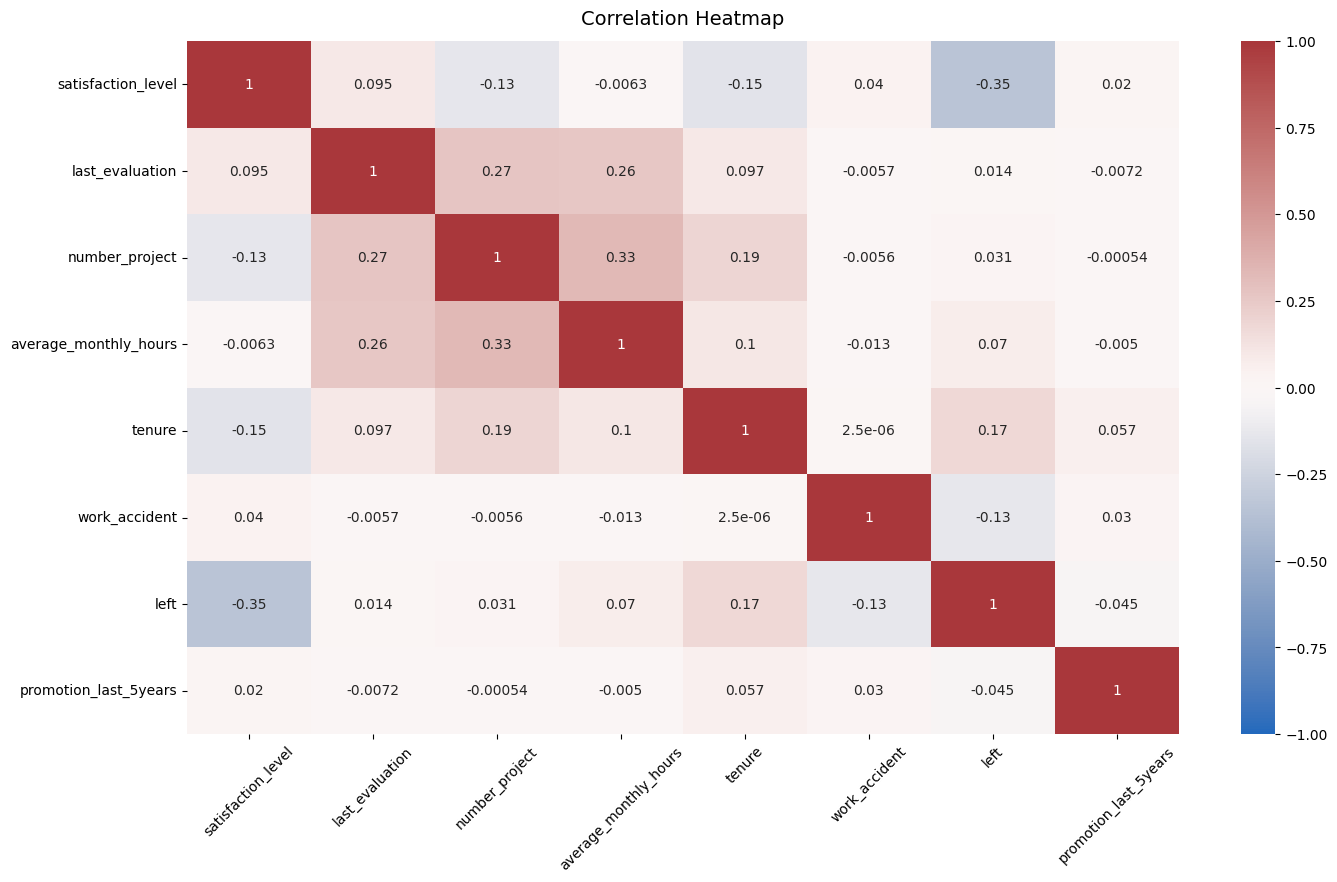

In [13]:
plt.figure(figsize=(16,9))
sns.heatmap(df1.corr(numeric_only=True), vmin = -1, vmax=1, annot = True, cmap=sns.color_palette('vlag', as_cmap=True))
plt.xticks(rotation = 45)
plt.title('Correlation Heatmap', fontsize = 14, pad= 12)

This heatmap suggests that employee's evaluation score, number of projects handled, their average working hours all have a positive correlation with each other. While an employee leaving is negatively correlated to their satisfaction levels.

## 1\. Avarage hours worked vs Number of projects

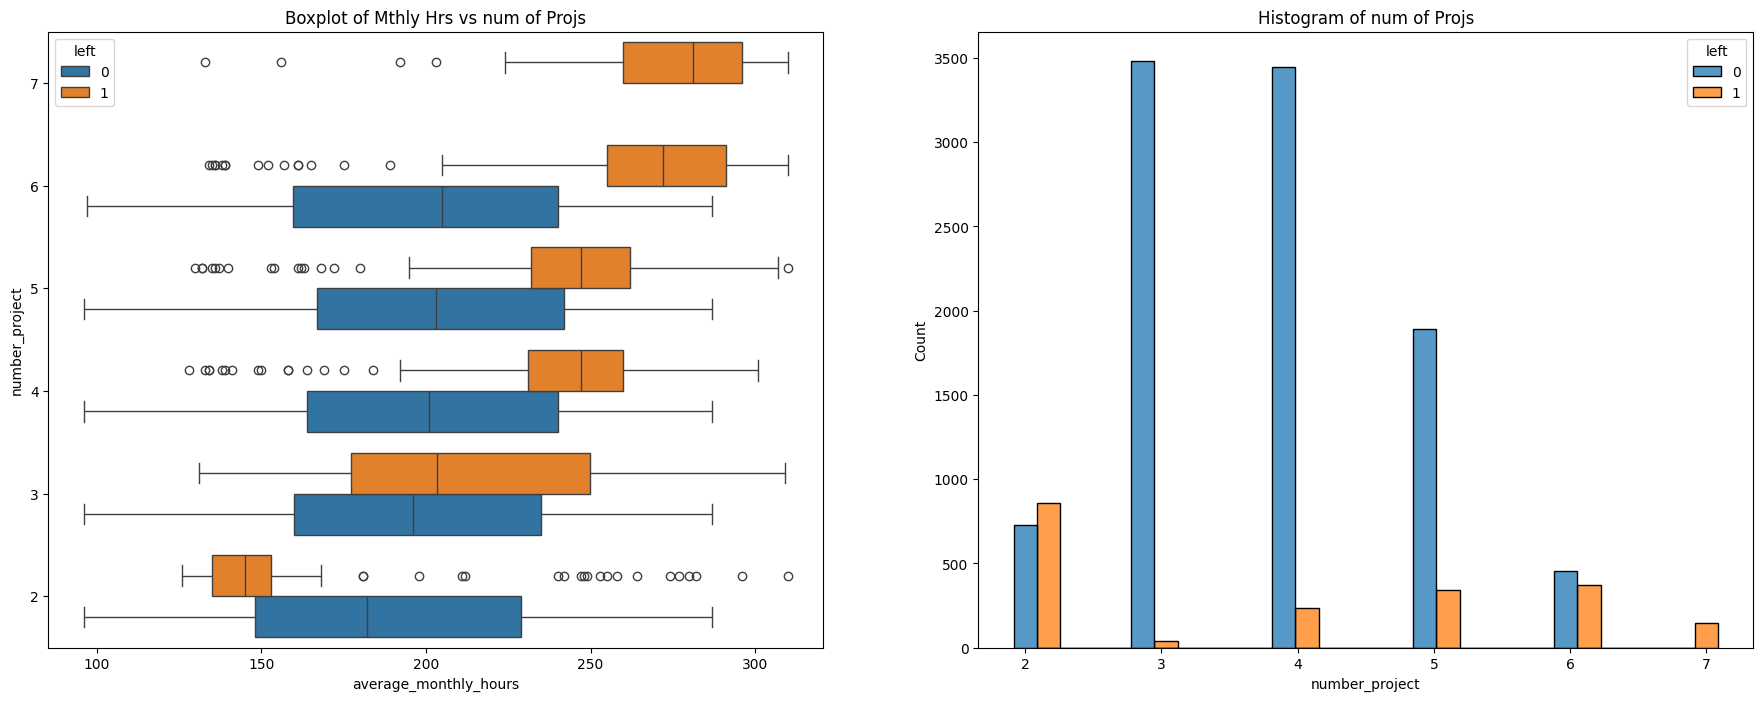

In [14]:
_, ax = plt.subplots(1,2, figsize = (22,8))
sns.boxplot(data=df1, x = 'average_monthly_hours', y = 'number_project', hue = 'left', orient='h',ax = ax[0])
ax[0].invert_yaxis() # 7 at top, 1 at btm
ax[0].set_title('Boxplot of Mthly Hrs vs num of Projs')

sns.histplot(data=df1, x = 'number_project', ax = ax[1], hue = 'left', shrink = 2,
             multiple='dodge') # multiple = 'dodge' means seperate the hue selection instead of overlap
ax[1].set_title('Histogram of num of Projs')

plt.show()


Insights:
1. From the boxplot, it makes sense that people who has more projects under them worked longer  hours. This can be seen as the mean hours for both groups, people who left and people who stayed, were increasing with the number of projects.

2. There are 2 distinct groups that can be observed. Group A: People who left working significantly lesser mean hours than the people who stayed. Group B: People who left but working significantly more mean hours than the people who stayed. 

    For A, it can be there they were fired for their lack of work, or were already quitting and hence worked less. For Group B, they may be overworked employees who got burned out after contributing the most.

3. Every who had 7 projects quit, and the IQR for the hours worked by people who had 6 & 7 projs were both around ~255 to 295 hrs/mth. This is much more than any other group. 

    For a 40-hour work week, with 2 weeks vacation, the average hours per month should be 40 hrs * 50 weeks / 12mths = 166.67 hrs/mth. We see that besides employees working on 2 projects, every other group exceeds this and are overworked.

4. From the histogram, we note that there's a healthy stay to leave ratio for handling 2-5 projects, however as we get to 6, the ratio is very tight.

Confirm if all 7 projects left:

In [15]:
df1[df1['number_project'] == 7]['left'].value_counts()

# Only one value (1=left) appears, it has 145 counts.

left
1    145
Name: count, dtype: int64

## 2\. Avarage hours worked vs Satisfaction levels

Text(0.5, 1.0, 'Mthly hours vs Satisfaction levels')

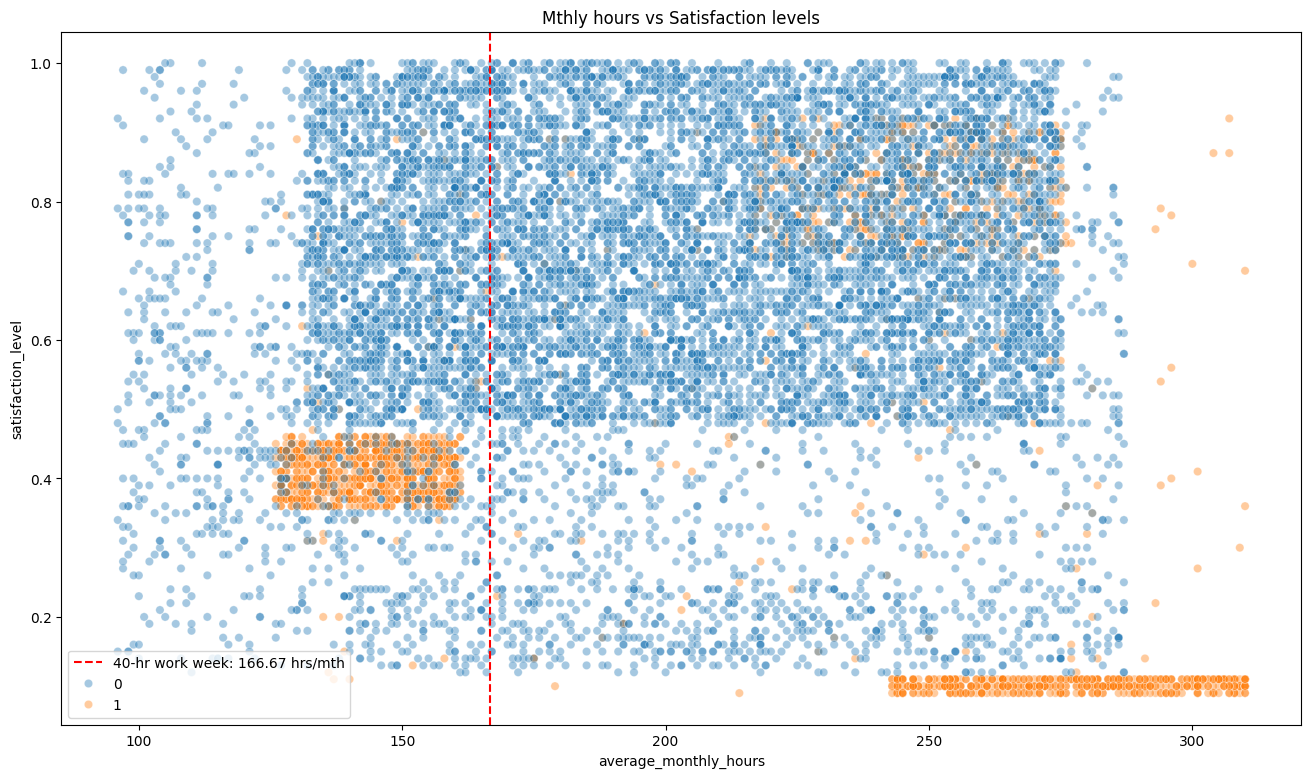

In [16]:
import matplotlib.lines as mlines
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x= 'average_monthly_hours', y = 'satisfaction_level', hue = 'left', alpha = 0.4 )
plt.axvline(x=40*50/12, color = 'red', ls='--')
# plt.legend(labels=['40-hr work week: 166.67 hrs/mth', 'left', 'stayed'])
# Create a custom legend handle for the vertical line
line_legend = mlines.Line2D([], [], color='red', linestyle='--', label='40-hr work week: 166.67 hrs/mth')

# Add the custom legend handle to the plot's legend
plt.legend(handles=[line_legend,*plt.gca().get_legend_handles_labels()[0]], loc='best')
plt.title('Mthly hours vs Satisfaction levels')

Insights:

1. Among people who left. There is a group in the bottom right who had worked very long hours and had very low satisfaction levels. It is likely that working well over the nominal monthly average of 166.67 hrs/mnth and hence were very dissatisfied with their jobs and left.

2. Another group who left, worked below the 166.67 hrs/mnth and had satisfaction level of 0.4. While this might be counterintuitive as they worked less hours, but were still unsatisfied, it might be because of the pressure of seeing their co-workers work more than them. After all, we can see a large density of scatterpoints to the right of the 166.67 hrs/mnth mark.

## 3\. Satisfaction levels vs Tenure

Text(0.5, 1.0, 'Tenure Histogram')

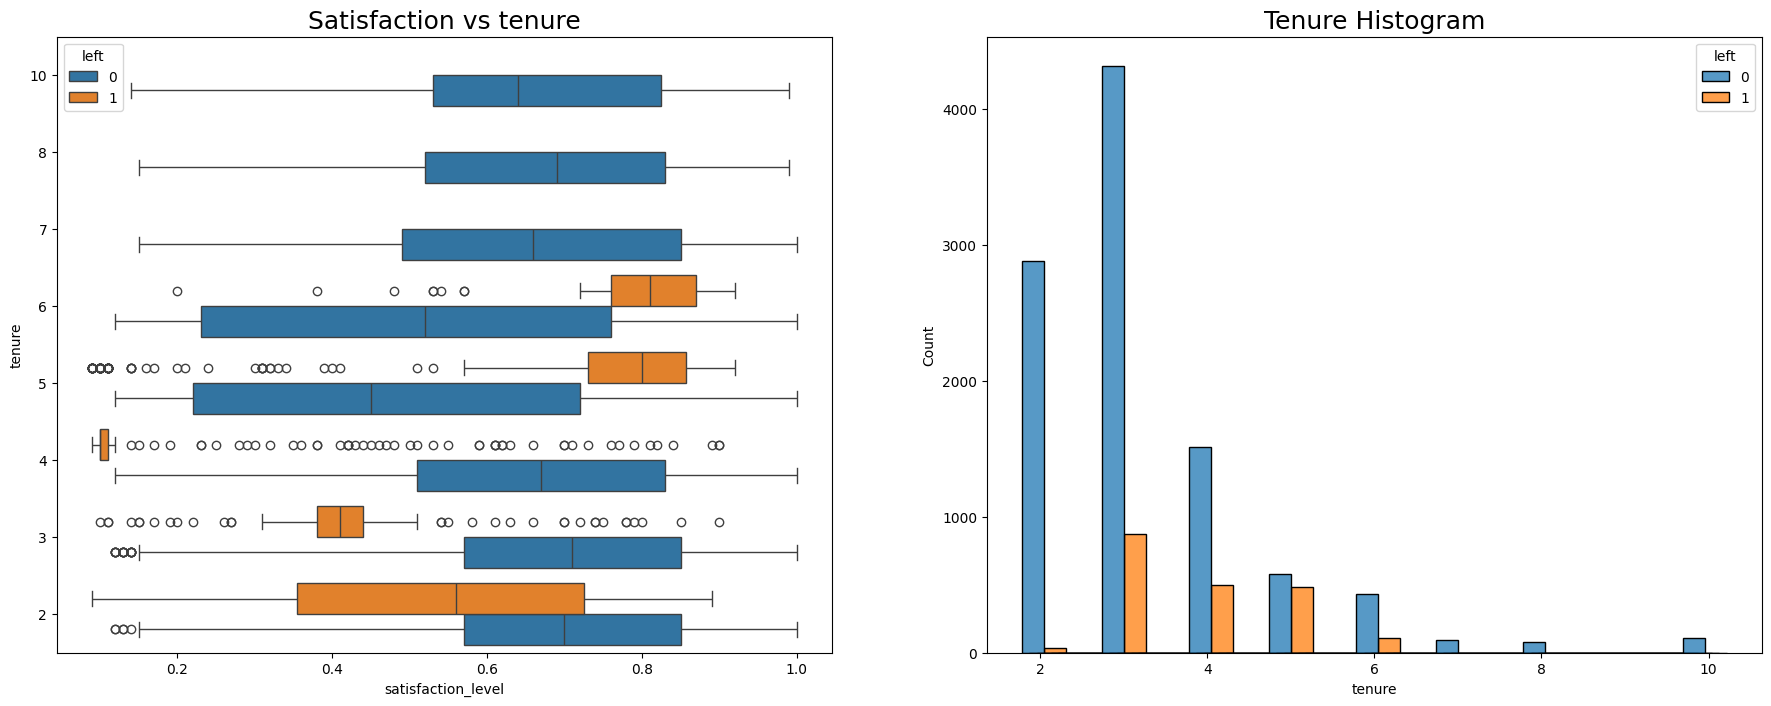

In [17]:
_,ax = plt.subplots(1,2,figsize = (22,8))

# boxplot
sns.boxplot(data= df1, x='satisfaction_level', y='tenure', hue='left', orient = 'h', ax = ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction vs tenure', fontsize = 18)

#histogram: tenure
sns.histplot(data = df1, x='tenure', hue = 'left', multiple= 'dodge', shrink = 6, ax = ax[1])
ax[1].set_title('Tenure Histogram', fontsize = 18 )

In [18]:
df1.groupby('left').agg(
    satisfaction_mean = ('satisfaction_level',np.mean),
     satisfaction_median = ('satisfaction_level',np.median),
)

,satisfaction_mean,satisfaction_median
left,,
0,0.667365,0.69
1,0.440271,0.41


Insights:

1. People who left had lower mean and median satisfaction than employees who stayed.

2. Among people who left. There is a group who are on short-tenure and were dissatisfied, and medium-length (5~6 yr) tenure employees were very satisifed.

3. People at 4 year mark had very unusually low satisfaction scores. Might be worth to investigate why this is so. No promotion?

4. The longest tenured employees (7+ years) didn't leave the company and had satisfaction scores similar to the new comers. However they were also very few in the company, perhaps they are high ranking employees. 

## 4\. Salary vs Tenure

Text(0.5, 1.0, 'Long-tenure salaries')

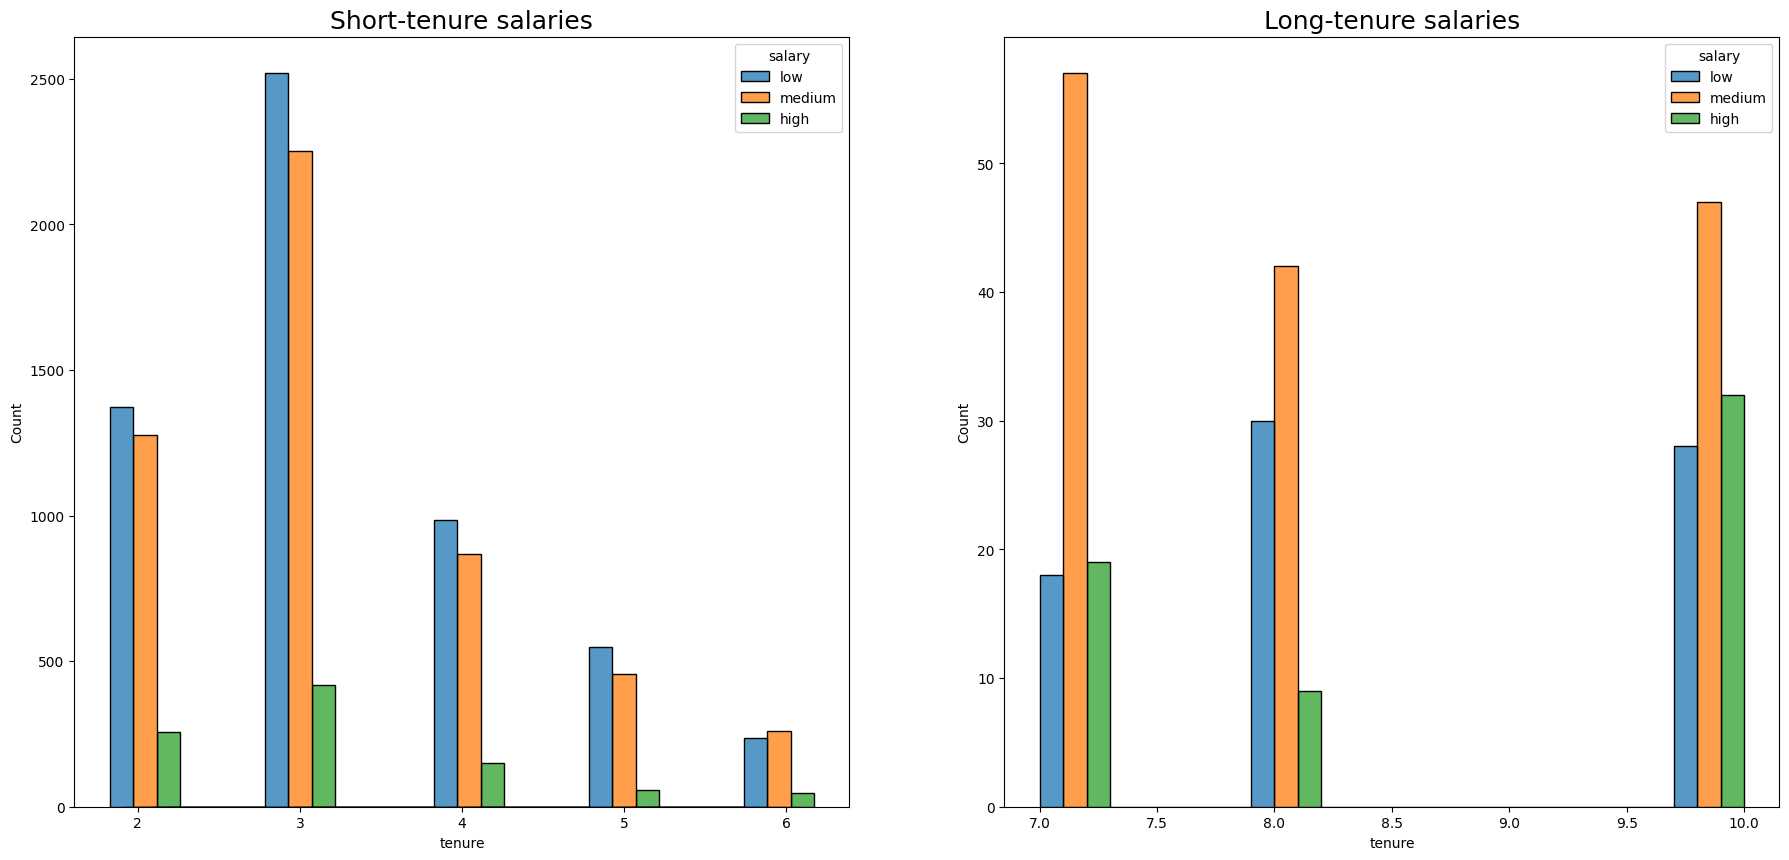

In [19]:
_, ax = plt.subplots(1,2,figsize = (22,10))

short_tenure = df1[df1['tenure'] < 7]
long_tenure = df1[df1['tenure'] > 6]


sns.histplot(data= short_tenure, x='tenure', hue = 'salary', hue_order=['low', 'medium', 'high'], multiple= 'dodge', shrink= 5, ax= ax[0])
ax[0].set_title('Short-tenure salaries', fontsize = 18)


sns.histplot(data= long_tenure, x='tenure', hue = 'salary', hue_order=['low', 'medium', 'high'], multiple= 'dodge', shrink= 1, ax= ax[1])
ax[1].set_title('Long-tenure salaries', fontsize = 18)

Insights:

1. For the short-tenured employees, their salary range were mostly low. However for long-tenured employees the mid salary range was more common.

2. It also showed that higher-paid employees were not disproportionate among the longer tenured employees.

## 5\. Working Hours vs Evaluation scores

Text(0.5, 1.0, 'Monthly hours vs Evaluation scores')

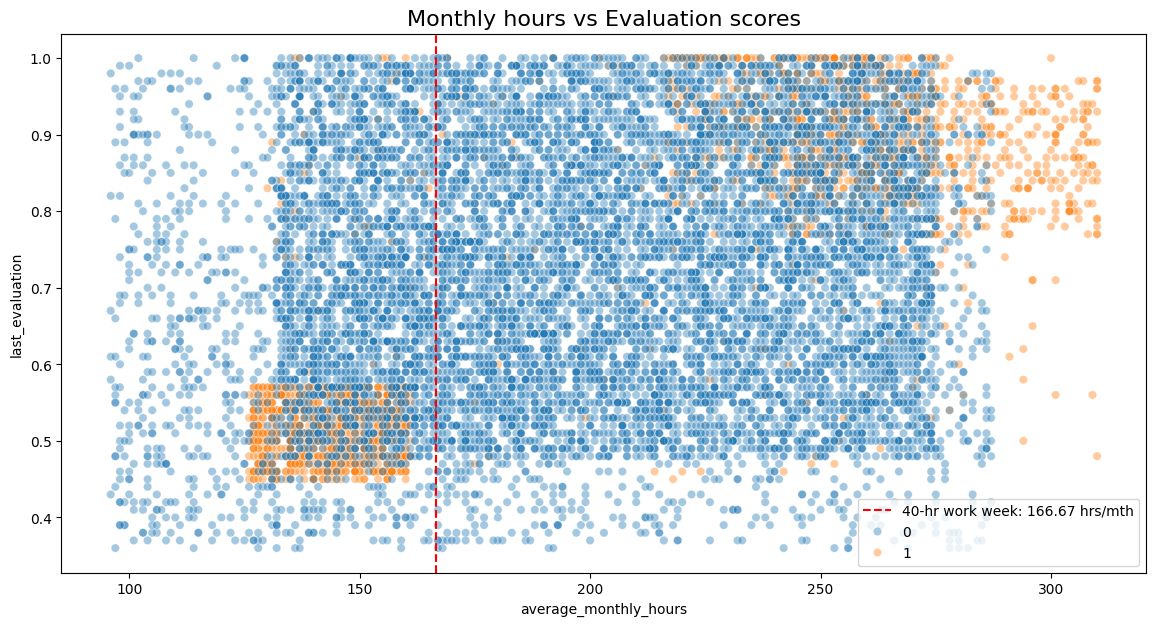

In [20]:
plt.figure(figsize=(14,7))
sns.scatterplot(data=df1, x='average_monthly_hours', y = 'last_evaluation', hue='left',alpha = 0.4)


plt.axvline(x=40*50/12, color = 'red', ls='--')
# Create a custom legend handle for the vertical line
line_legend = mlines.Line2D([], [], color='red', linestyle='--', label='40-hr work week: 166.67 hrs/mth')
# Add the custom legend handle to the plot's legend
plt.legend(handles=[line_legend,*plt.gca().get_legend_handles_labels()[0]], loc='best')

plt.title('Monthly hours vs Evaluation scores', fontsize = 16)


Insights:

1. Among the employees who left, there were 2 distinct groups. The first group worked less than the nominal 40-hr work week and had lower evalution scores. While the second group worked well above the nominal 40-hr work week and had high evaluation scores.

2. There seem to be a correlation between working longer hours and receiving higher evaluation scores.

3. The upper left quadrant is relatively sparse, this suggests working less hours doesn't contribute to high evalution scores. However, working long hours also doesn't guarantee higher evaulation scores.

4. The plot is more densely populated to the right of the nominal 40-hr work week, indicating most employees are overworked.

## 6\. Working Hours vs Promotions in 5 yrs

Text(0.5, 1.0, 'Working Hours vs Promotions in 5 yrs')

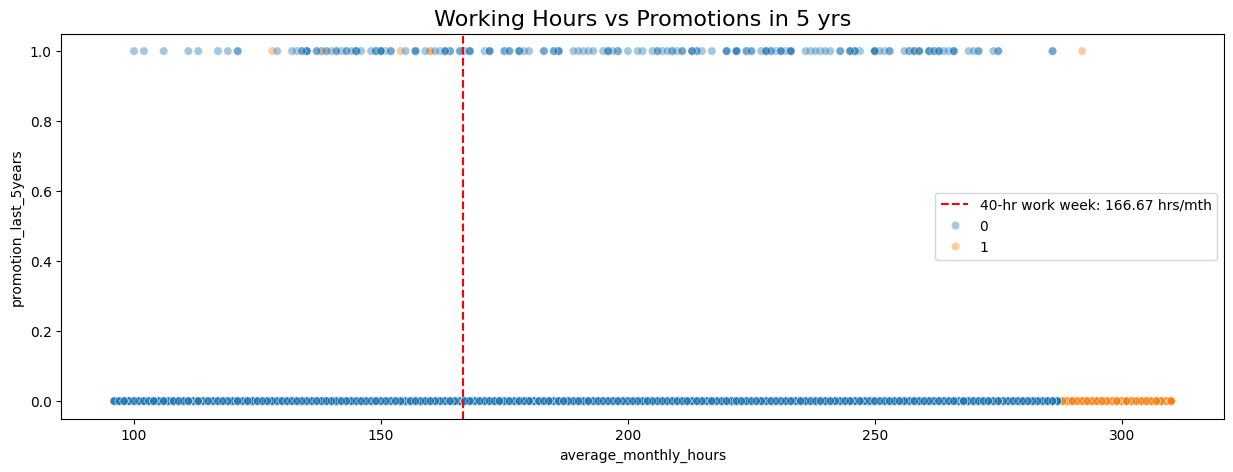

In [21]:
plt.figure(figsize=(15,5))

sns.scatterplot(data = df1, x = 'average_monthly_hours', y = 'promotion_last_5years', hue = 'left',alpha = 0.4 )

# red nominal 40hr work week line
plt.axvline(x=40*50/12, color = 'red', ls='--')
line_legend = mlines.Line2D([], [], color='red', linestyle='--', label='40-hr work week: 166.67 hrs/mth')
plt.legend(handles=[line_legend,*plt.gca().get_legend_handles_labels()[0]], loc='best')


plt.title('Working Hours vs Promotions in 5 yrs',  fontsize = 16)

Insights:

1. It seemed most of employees who averaged more than 275 hours/month, the longest hours, and weren't promoted in the last 5 years, left the company. However employees leaving was much smaller among people who were promoted, even if they were similarly overworked.

2. Also very few employees were actually promoted in general, even among employees who were working the longest hours.

## 7\. Stayed/Left by Department

Text(0.5, 1.0, 'Stayed/left by Department')

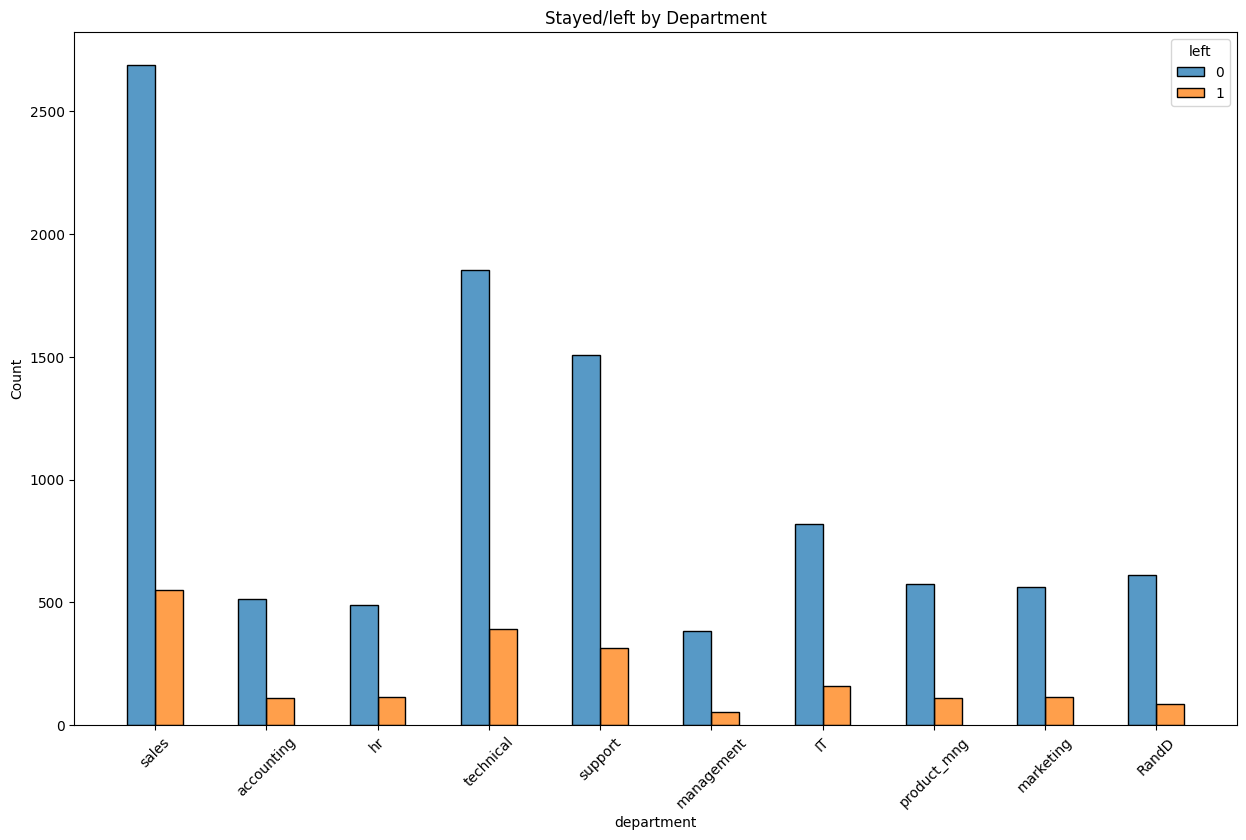

In [22]:
plt.figure(figsize=(15,9))
sns.histplot(data=df1, x='department', hue = 'left', multiple= 'dodge', shrink=0.5, hue_order=[0,1])
plt.xticks(rotation = 45)
plt.title('Stayed/left by Department')

Insights:

It seemed there is no specific distinction among employees leaving across the different departments. The proportion of those who left to those who stayed do not differ significantly.

## Insights Summary:

Leaving is tied to longer working hours, handling many projects and employees having lower satisfaction scores. It may not be rewarding to work long hours and not guarantee a promotion or receive good evaluation scores. This points towards employees being burned out. Additionally, it can be noted that employees generally do not leave the company after more than 6 years.


# Model Building

# Binomial Logistic Regression model

Since variable we want to predict: 'left' is either 1 or 0. It involes binary classifcation, hence a Binomial Logistic Regression model can be used.

Encode categorical variables 'department' and 'salary'. Note that 'salary' is ordinal, hence it is not simply one-hot encoded.

In [23]:
df2 = df1.copy()
df2['salary'] = (
    df2['salary'].astype('category')
    .cat.set_categories(['low','medium','high']) # sets the order
    .cat.codes # converts to 0-2
    )

# one-hot encode the remaining categorical columns (only 'department' left) 
df2 = pd.get_dummies(df2, drop_first = True) # While it shows True or False, instead of encoded 1s or 0s.
# Most ML models including scikit-learn implicitly converts to 1s and 0s during computation.

df2.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,True,False,False


Logistic Regression models are sensitive to outliers. Good idea to remove the tenure outliers from the EDA stage.

In [24]:
def remove_outliers(df) -> pd.DataFrame:
    numeric_columns = df.select_dtypes(include='number').columns
    
    def is_binary_col(col):
        return set(df[col].unique()) <= {0,1,2}
        
    for col in numeric_columns:
        if not is_binary_col(col):
            org_len = len(df)
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3-Q1

            lowerlimit = Q1  - 1.5 * IQR
            upperlimit = Q3  + 1.5 * IQR

            df = df[(df[col] <= upperlimit) & (df[col] >= lowerlimit)]
            final_len = len(df)

            print(f'For columns: {col}, removed {org_len-final_len} rows.')
    return df

df3 = remove_outliers(df2).reset_index(drop= True)
df3.tail()

For columns: satisfaction_level, removed 0 rows.
For columns: last_evaluation, removed 0 rows.
For columns: number_project, removed 0 rows.
For columns: average_monthly_hours, removed 0 rows.
For columns: tenure, removed 824 rows.


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
11162,0.72,0.64,4,192,3,0,0,0,1,False,False,False,False,False,False,True,False,False
11163,0.48,0.50,5,142,4,0,0,0,1,False,False,False,False,False,False,False,False,False
11164,0.19,0.79,4,229,4,0,0,0,1,False,False,False,False,False,True,False,False,False
11165,0.62,0.85,3,237,3,1,0,0,1,False,False,False,False,False,False,False,False,False
11166,0.50,0.73,4,180,3,0,0,0,0,False,False,False,False,False,False,False,False,False


Done preparing data for training. Start training the Logistic Regression model.

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

y = df3['left']
x = df3.drop('left', axis = 1)

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size= 0.25, stratify= y, # Since the distribution of 'left' is uneven (more stayed than left), stratify to ensure even distribution of 'left' in the split.
    random_state= 69
    )

LReg_model = LogisticRegression(random_state=69, max_iter=500).fit(x_train, y_train)

Predict and evaluate model.

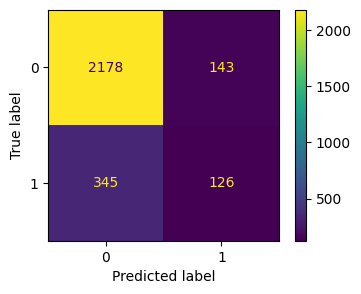

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = LReg_model.predict(x_test)

con_matrix = confusion_matrix(y_true= y_test, y_pred= y_pred, labels = LReg_model.classes_)

_, ax = plt.subplots(figsize=(4, 3))
ConfusionMatrixDisplay(confusion_matrix = con_matrix, display_labels=LReg_model.classes_).plot(ax = ax)

The model is able to accurately predict if an employee would not leave the company (True Negatives in the upper left quadrant), however it is not as useful in predicting if an employee would leave the company.

This could be attributed to the fact that there were a lot more employees who stayed in the dataset, hence little data of people who left for the model to train on accurately.

In [27]:
df3['left'].value_counts(normalize= True)

left
0    0.831468
1    0.168532
Name: proportion, dtype: float64

It can be seen that the dataset is imbalanced with 83% stayed labels and only 17% left labels.

Evaluation on other metrics: Precision, Recall, f1-score, Accuracy

In [28]:
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_pred, target_names= ['Predicted Stay', 'Predicted Leave']))

                 precision    recall  f1-score   support

 Predicted Stay       0.86      0.94      0.90      2321
Predicted Leave       0.47      0.27      0.34       471

       accuracy                           0.83      2792
      macro avg       0.67      0.60      0.62      2792
   weighted avg       0.80      0.83      0.81      2792



**Summary**

The Binomial Logistic Regression model achieved a weighted average (of predictions *across* 'Stayed' and 'Left') precision of 80%, recall of 83%, f1-score of 81%, and accuracy of 83%. While this seem effective, if we consider solely the predictions of employees who left, the scores are significantly lower.

# Tree-based Model

# Single Decision Tree 1

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeClassifier(random_state=69)
params = {
    'max_depth' : [4,6,8,None],
    'min_samples_leaf' : [2,5,1],
    'min_samples_split' : [2,4,6],
}

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

tree1 = GridSearchCV(tree, param_grid= params, scoring= scoring, 
                     cv = 4, # For each combi of params: we get 4 folds, 1 fold gets taken to be the validation set each time. After 4 iterations, record the averages of 4 'accuracy', 'precision', 'recall', 'f1', 'roc_auc'.
                      refit='roc_auc') # the final chosen model will be the param combi that gave the best roc_auc score. 
# Then take these winning params and retrain based on the entire dataset.

In [30]:
%%time

tree1.fit(x_train, y_train)

print(f'Best combination parameters are: {tree1.best_params_}')
print(f'Best ROC_AUC score: {tree1.best_score_}') # the best_score is taking from the metric given to the "refit = " when defining your tree.

Best combination parameters are: {'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best ROC_AUC score: 0.9746591234288982
CPU times: user 3.94 s, sys: 126 ms, total: 4.06 s
Wall time: 4.51 s


In [31]:
def display_best_result(model_name:str, model_object):

    cv_results = pd.DataFrame(model_object.cv_results_) # all the mean_results (of the 4 folds) for each params combi.

    best_auc_results = cv_results.iloc[cv_results['mean_test_roc_auc'].idxmax(),:] #Find the row w the highest roc_auc.

    auc = best_auc_results['mean_test_roc_auc']
    f1 = best_auc_results['mean_test_f1']
    recall = best_auc_results['mean_test_recall']
    precision = best_auc_results['mean_test_precision']
    accuracy = best_auc_results['mean_test_accuracy']

    return pd.DataFrame({
        'model': [model_name],
        'auc': [auc],
        'precision': [precision],
        'recall': [recall],
        'f1': [f1],
        'accuracy': [accuracy],
    })

tree1_result = display_best_result('tree1', tree1)
tree1_result.head()


,model,auc,precision,recall,f1,accuracy
0,tree1,0.974659,0.955344,0.915672,0.934999,0.978508


The strong AUC score indicates the model can predict people who leave the company very well. Additionally all the other metrics are strong indicators of good model performance. The split of the decision tree can also be inspected.

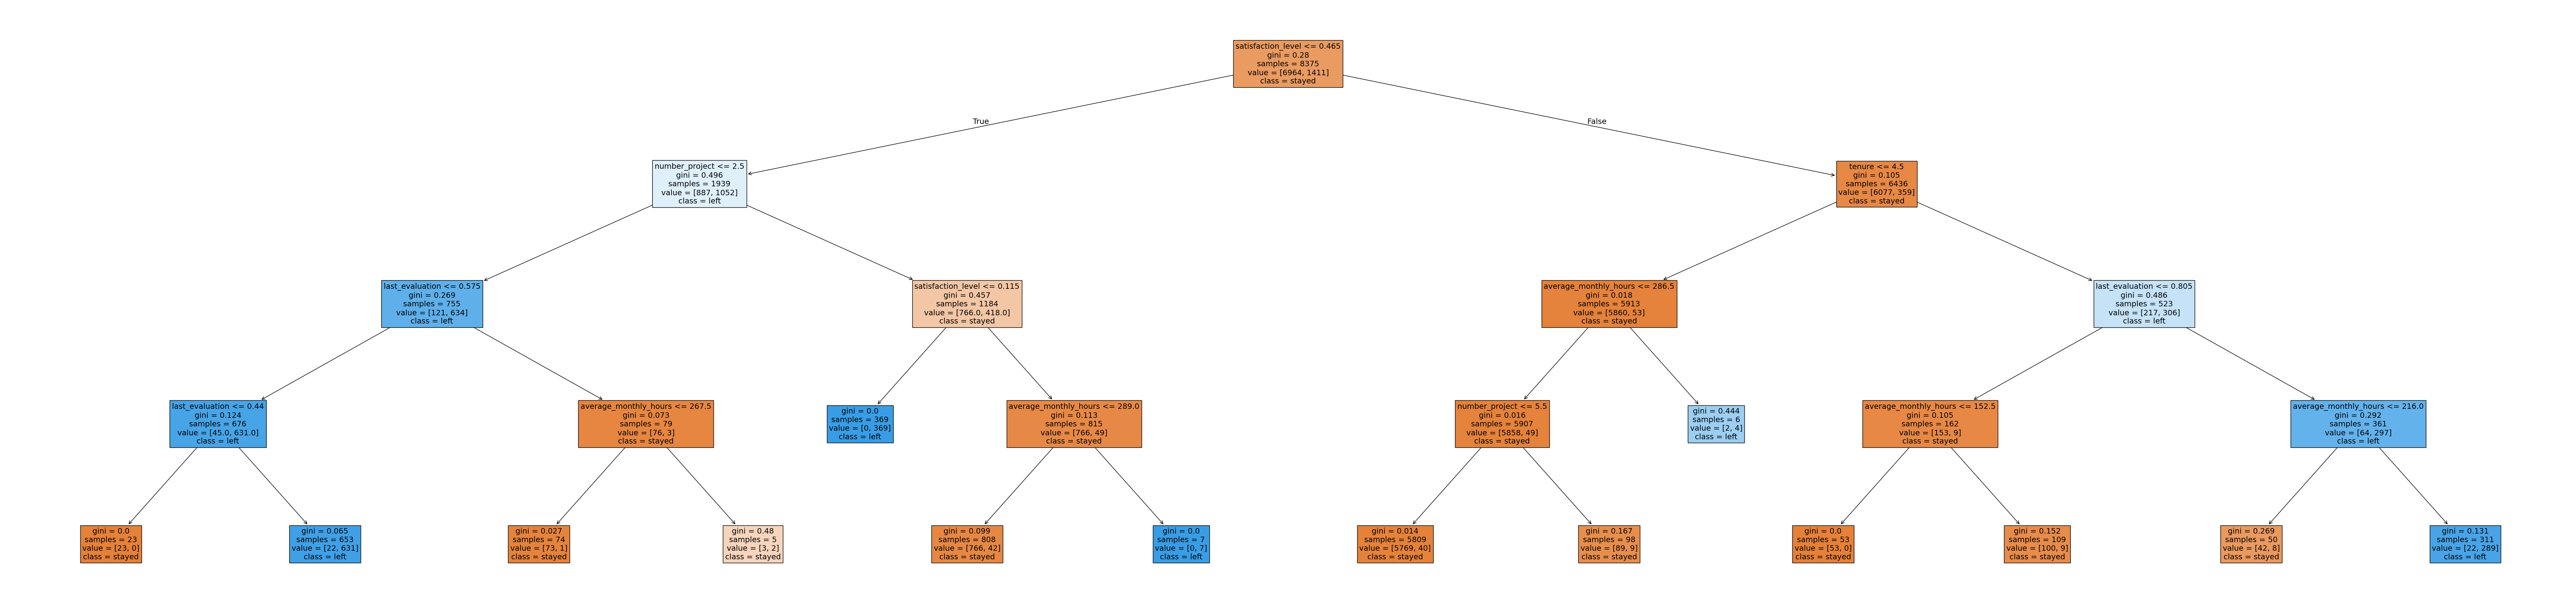

In [32]:
from sklearn.tree import plot_tree

plt.figure(figsize=(85,20))
plot_tree(decision_tree=tree1.best_estimator_, max_depth=6, fontsize=14, feature_names=x.columns,
          class_names={0: 'stayed', 1: 'left'}, filled= True)
plt.show()


However as a single decision tree can be prone to overfitting, we can consider building a random forest model, this takes the aggregate of multiple trees.

# Random Forest 1

In [33]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=69)
params = {
    'max_depth' : [3,5,None],
    'max_features': [1.0],
    'max_samples': [0.7, 1.0],
    'min_samples_leaf' : [1,2,3],
    'min_samples_split' : [2,3,4],
    'n_estimators' : [300, 500],
}

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

forest1 = GridSearchCV(forest, param_grid=params, scoring= scoring, cv=4, refit='roc_auc')

In [34]:
%%time

forest1.fit(x_train, y_train)

CPU times: user 19min 4s, sys: 21.5 s, total: 19min 25s
Wall time: 20min 22s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=69),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [35]:
# save model
import pickle

path = './Models/'
model_name = 'rf1_model'

if not os.path.exists(path):
    os.makedirs(path)

with open(path + model_name + '.pickle', 'wb') as to_write:
    pickle.dump(forest1, to_write)

In [36]:
#load model

with open(path + model_name + '.pickle', 'rb') as to_read:
    loaded = pickle.load(to_read)

In [37]:
compare_results = pd.concat([tree1_result, display_best_result('random_forest1', forest1)]).reset_index(drop=True)

compare_results.head()

,model,auc,precision,recall,f1,accuracy
0,tree1,0.974659,0.955344,0.915672,0.934999,0.978508
1,random_forest1,0.984759,0.975838,0.914254,0.944029,0.981732


The evaluation score of the random forest for all metrics, except the recall, were better than the single decision tree. The recall was only 0.001 smaller which is a negligible amount. This indicates the random forest model outperforms the single decision tree model.

Evaluating on the test set:

In [38]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score,recall_score,f1_score

preds = forest1.best_estimator_.predict(x_test)

auc = roc_auc_score(y_true=y_test, y_score=preds)
acc = accuracy_score(y_true=y_test, y_pred=preds)
precision = precision_score(y_true=y_test, y_pred=preds)
recall = recall_score(y_true=y_test, y_pred=preds)
f1 = f1_score(y_true=y_test, y_pred=preds)


test_scores = pd.DataFrame({
    'model': ['random_forest1 test'],
    'precision': [precision],
    'recall': [recall],
    'f1': [f1],
    'accuracy': [acc],
    'auc': [auc],
})

compare_results = pd.concat([compare_results, test_scores]).reset_index(drop=True)

compare_results.head()

,model,auc,precision,recall,f1,accuracy
0,tree1,0.974659,0.955344,0.915672,0.934999,0.978508
1,random_forest1,0.984759,0.975838,0.914254,0.944029,0.981732
2,random_forest1 test,0.954921,0.951648,0.919321,0.935205,0.978510


The test scores are very similar to the validation score on the training set. The scores indicate that this is still a very strong model. From its performance on the test set, we can be confident the model will perform well on unseen data.

# Random  Forest 2

**Feature Engineering**

Should we be skeptical of the high evaluation scores? Perhaps due to syntactic data, some data leakage is occuring where data is available in the training set where it's not data to be expected when the model is actually deployed. For example: 

1. It may not be likely that all the satisfaction levels of employees are recorded. 
2. The average monthly hours column is influenced by employees already deciding to quit, or employees identified to be fired by management.

For further investigation, Feature Engineering will be incorporated to replicate a more realistic training dataset, which subsequent models score can be better replicated in production.

Drop 'satisfaction_level' and 'average_monthly_hours' columns, and create new feature 'overworked'. 

For someone to work 50 weeks per year, 5 days a week, 8 hrs a day. 166.67 hrs/month is approximately the average monthly hours. Take an employee being overworked as one who worked > 175 hrs/month.

In [39]:
df4 = df3.copy()

df4['overworked'] = (df3['average_monthly_hours'] > 175).astype(int)

df4 = df4.drop(['satisfaction_level', 'average_monthly_hours'], axis = 1)

df4.head()

,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,3,0,1,0,0,False,False,False,False,False,False,True,False,False,0
1,0.88,7,4,0,1,0,1,False,False,False,False,False,False,True,False,False,1
2,0.87,5,5,0,1,0,0,False,False,False,False,False,False,True,False,False,1
3,0.52,2,3,0,1,0,0,False,False,False,False,False,False,True,False,False,0
4,0.50,2,3,0,1,0,0,False,False,False,False,False,False,True,False,False,0


In [40]:
y = df4['left']
x = df4.drop('left', axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25, stratify= y, random_state= 69)

# Exact same model, grid params, scoring metrics, cross validation folds, refit as above.
forest2 = GridSearchCV(forest, param_grid=params, scoring=scoring, cv = 4, refit='roc_auc')

In [41]:
%%time

# Just with new feature-engineered training and testing sets now.
forest2.fit(x_train,y_train)

CPU times: user 12min 57s, sys: 10.7 s, total: 13min 7s
Wall time: 13min 29s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=69),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [42]:
# save model
import pickle

path = './Models/'
model_name = 'rf2_model'

if not os.path.exists(path):
    os.makedirs(path)

with open(path + model_name + '.pickle', 'wb') as to_write:
    pickle.dump(forest2, to_write)

In [43]:
#load model

with open(path + model_name + '.pickle', 'rb') as to_read:
    loaded = pickle.load(to_read)

In [44]:
compare_results = pd.concat([compare_results, display_best_result('random_forest2', forest2)]).reset_index(drop=True)
compare_results.head()

,model,auc,precision,recall,f1,accuracy
0,tree1,0.974659,0.955344,0.915672,0.934999,0.978508
1,random_forest1,0.984759,0.975838,0.914254,0.944029,0.981732
2,random_forest1 test,0.954921,0.951648,0.919321,0.935205,0.978510
3,random_forest2,0.969309,0.887868,0.911421,0.899334,0.965612


While comparing to the random_forest1 (and single decision tree), the scores fell slightly. This is to be expected as fewer features were taken into account for training the model. However the scores are still very good.

Now evaluating on test set:

In [45]:
preds = forest2.best_estimator_.predict(x_test)

auc = roc_auc_score(y_true=y_test, y_score=preds)
acc = accuracy_score(y_true=y_test, y_pred=preds)
precision = precision_score(y_true=y_test, y_pred=preds)
recall = recall_score(y_true=y_test, y_pred=preds)
f1 = f1_score(y_true=y_test, y_pred=preds)


test_scores = pd.DataFrame({
    'model': ['random_forest2 test'],
    'precision': [precision],
    'recall': [recall],
    'f1': [f1],
    'accuracy': [acc],
    'auc': [auc],
})

compare_results = pd.concat([compare_results, test_scores]).reset_index(drop=True)
compare_results.head()

,model,auc,precision,recall,f1,accuracy
0,tree1,0.974659,0.955344,0.915672,0.934999,0.978508
1,random_forest1,0.984759,0.975838,0.914254,0.944029,0.981732
2,random_forest1 test,0.954921,0.951648,0.919321,0.935205,0.978510
3,random_forest2,0.969309,0.887868,0.911421,0.899334,0.965612
4,random_forest2 test,0.939519,0.878351,0.904459,0.891213,0.962751


Again, evaluating on the test set, the scores fall slightly again. However besides the precision and f1 being slightly below 90%, all other metrics are above 90% and this is a strong model that can be used in production on unseen data.

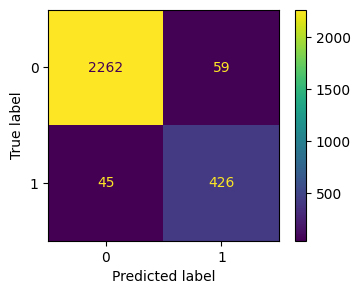

In [46]:
con_matrix = confusion_matrix(y_true= y_test, y_pred= preds, labels = forest2.classes_)

_, ax = plt.subplots(figsize=(4, 3))
ConfusionMatrixDisplay(confusion_matrix = con_matrix, display_labels=forest2.classes_).plot(ax = ax)

This model predicts both employees who stayed and employees who left well. As opposed to only predicting well for the employees who stayed, as with the Logistic Regression model.

The most important features in the random forest model can be further inspected.

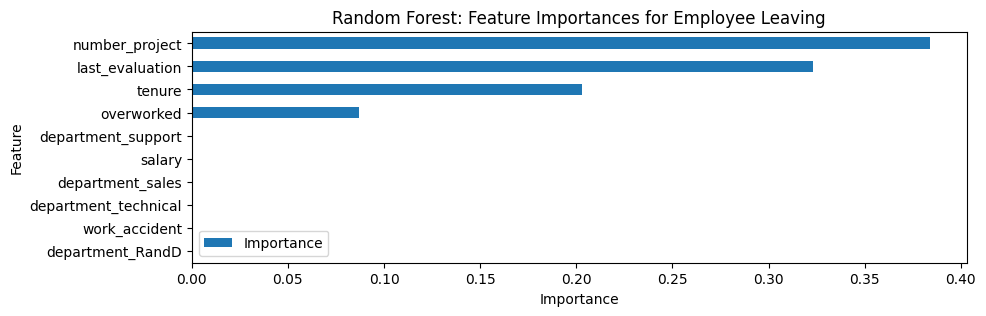

In [47]:
feature_importance = forest2.best_estimator_.feature_importances_

indices_of_top10 = np.argsort(feature_importance)[-10:]
# sorts the array then I take index (-10 to the end), this allows the capture of the top 10 index.

features = x.columns[indices_of_top10]
top10_importance_values = feature_importance[indices_of_top10]

impt_df = pd.DataFrame({
    'Feature': features,
    'Importance': top10_importance_values,
})

impt_df = impt_df.sort_values(by='Importance')

fig = plt.figure(figsize=(10,3))
ax1 = fig.add_subplot(1,1,1)

impt_df.plot(kind  = 'barh', ax = ax1, x = 'Feature', y= 'Importance')

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

The plot shows the most important features in predicting if an employee leaves the company. The  `number_project`, `last_evaluation`, `tenure`, and `overworked` have the highest importance, in that orders. They are the most effective in predicting the outcome variable `left`.

# Summary of model results

**Logistic Regression model**

The Binomial Logistic Regression model achieved a weighted average precision of 80%, recall of 83%, f1-score of 81%, and accuracy of 83% on the test set. While this seem effective, if we consider solely the predictions of employees who left, the scores are significantly lower.

**Tree-based models**

After conducting Feature Engineering, the Random Forest achieved a precision of 87%, recall of 90%, f1-score of 89%, accuracy of 96%, and an AUC of 93% on the test set. The respective Random Forests outperforms the single decision trees with or without Feature Engineering.

## Conclusion and Recommendations

The models and feature importance extracted confirms that employees are overworked.

To retain employees, based on the identified factors contributing to employees leaving, the following recommendations could be presented to stakeholders:

1. Cap the number of projects an employee can work on at any one time.
2. Consider promoting employees at the 4-year mark, or investigate why the 4-year tenured employees are noticeably dissatisfied.
3. Reward employees for working longer hours, or dissuade them from doing so.
4. Familiarise employees with the company's overtime policies, as well as expected workload and time offs.
5. Working longer hours should not be a metric for the high evaluation scores. Instead consider a more proportionate way to reward employees who contribute more/put in more effort.
6. Finally on a broder level, hold company-wide and within-team wide disccusions to address the company work culture, across the board and in specific contexts.
